In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [2]:
train_df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#categorical variable

def bar_plot(variable):
    '''
    input:variable examp: "Sex" 
    output: bar plot & value count
    '''
    var=train_df[variable]
    varValue=var.value_counts()

    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print(f"{variable}: \n {varValue}")

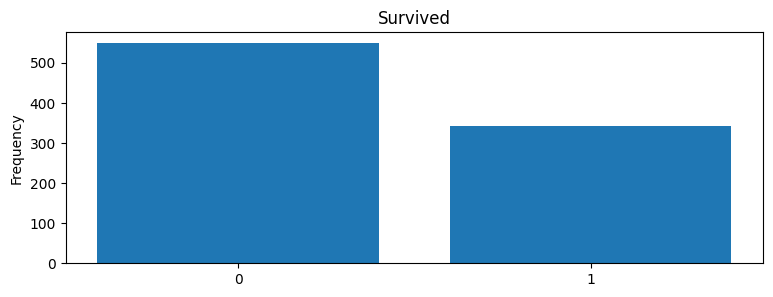

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


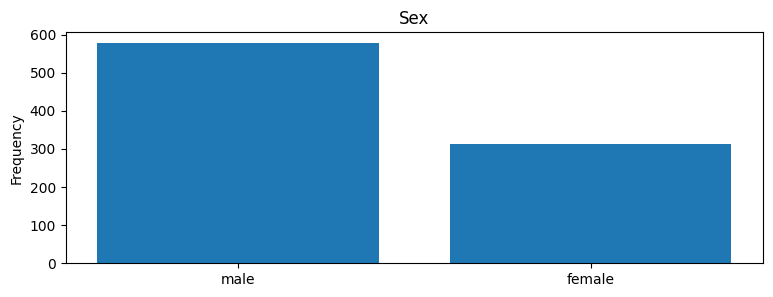

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


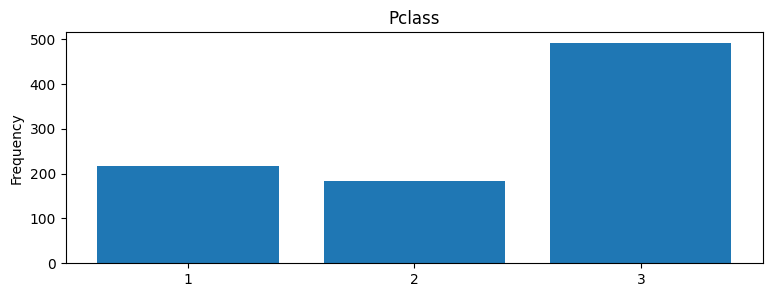

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


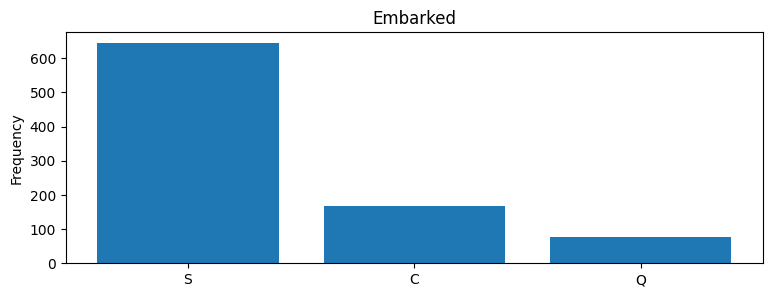

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


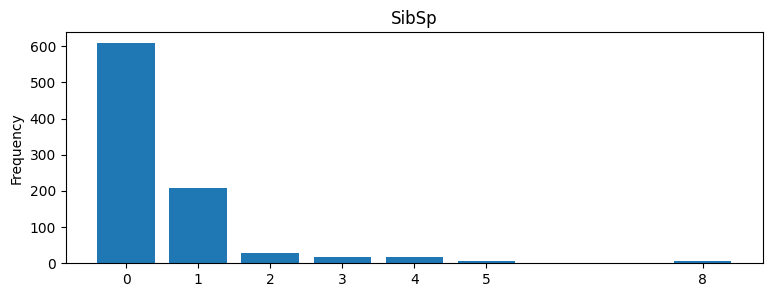

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


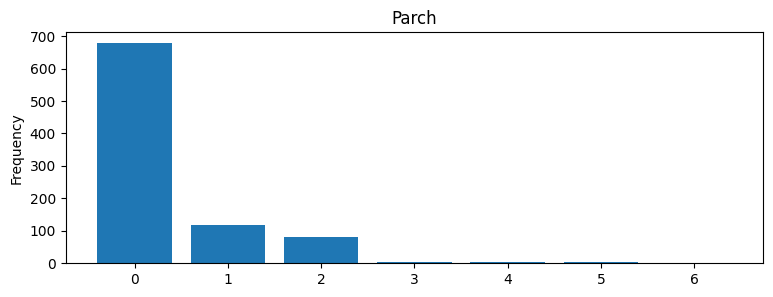

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [8]:
category_1=["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category_1:
    bar_plot(c)

In [9]:
#numeric variables
category_2=["Cabin","Name","Ticket"]

for c in category_2:
    print(f"{train_df[c].value_counts()}")

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64
Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 214

In [10]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution with hist")
    plt.show()

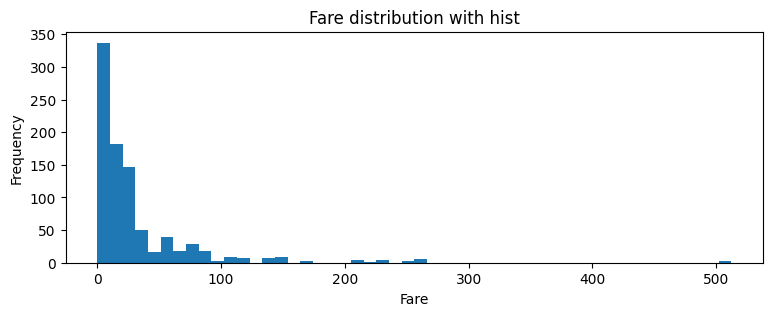

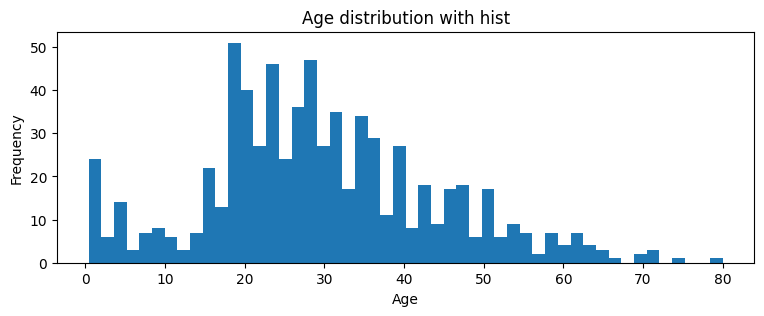

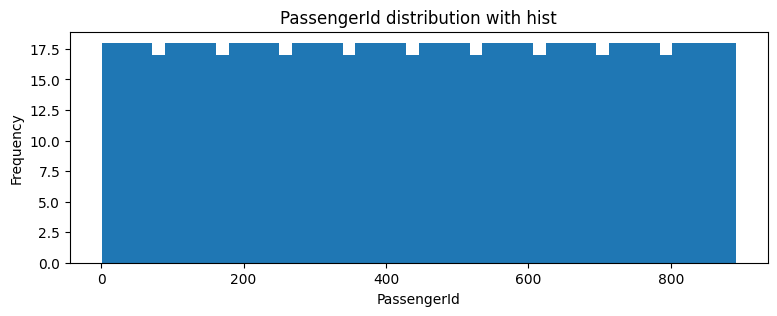

In [11]:
numericVar=["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

In [12]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [16]:
#outlier detection
def detect_outliers(df,features):
    outlier_indices=[]

    for c in features:
        #1st quartile 
        Q1=np.percentile(df[c],25)   
        #3rd quartile 
        Q3=np.percentile(df[c],75) 
        #IQR
        IQR=Q3-Q1
        #outlier step
        outlier_step=IQR*1.5
        #detect outlier and their indeces
        oulier_list_col=df[(df[c] < Q1-outlier_step) | (df[c] > Q3+outlier_step)].index
        #store indeces
        outlier_indices.extend(oulier_list_col)

    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>2)

    return multiple_outliers

In [17]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [18]:
#drop outliers
train_df=train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

In [19]:
#missing value
train_df_len=len(train_df)

In [20]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [21]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [22]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


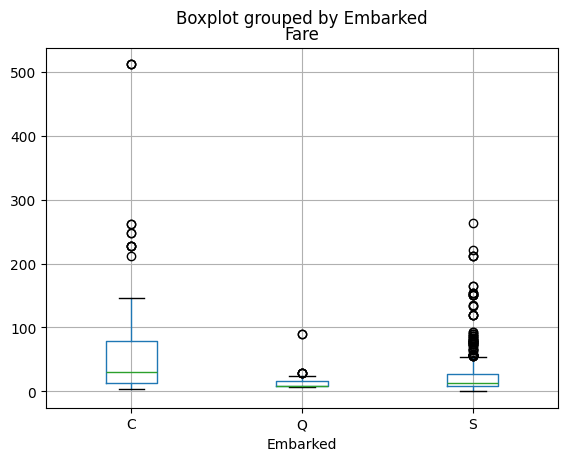

In [23]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [24]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [25]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


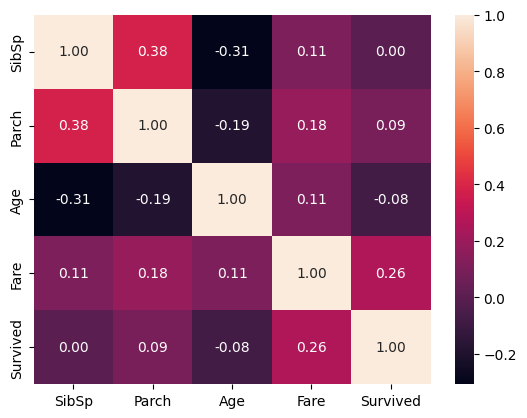

In [26]:
 #visualization

list_1=["SibSp","Parch","Age","Fare","Survived"]
sbn.heatmap(train_df[list_1].corr(),annot=True,fmt=".2f")
plt.show()

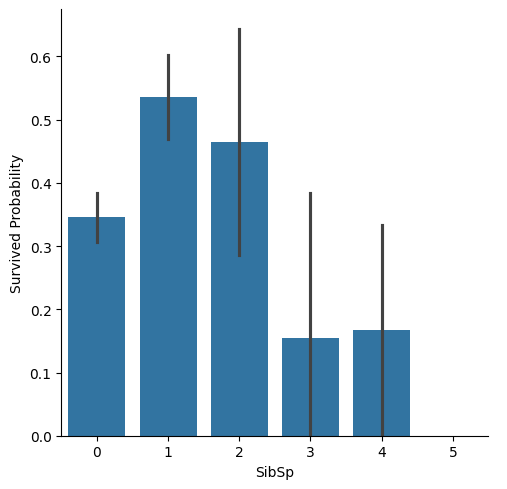

In [27]:
#SibSb--Survived
g=sbn.catplot(x="SibSp",y="Survived",data=train_df,kind="bar")
g.set_ylabels("Survived Probability")
plt.show()

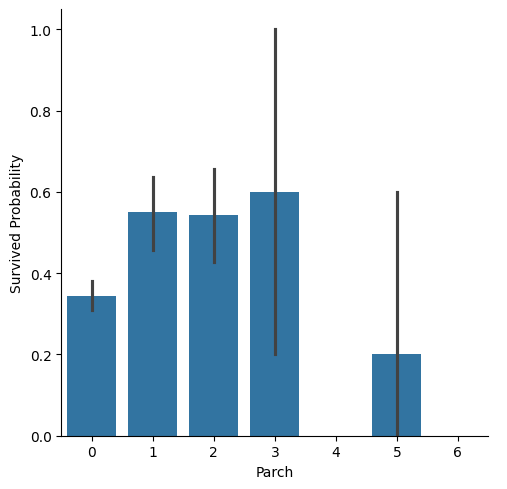

In [28]:
#Parch--Survived
g=sbn.catplot(x="Parch",y="Survived",data=train_df,kind="bar")
g.set_ylabels("Survived Probability")
plt.show()

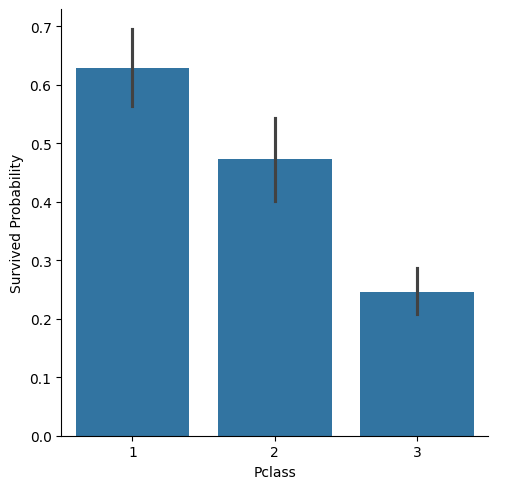

In [29]:
#Pclass--Survived
g=sbn.catplot(x="Pclass",y="Survived",data=train_df,kind="bar")
g.set_ylabels("Survived Probability")
plt.show()

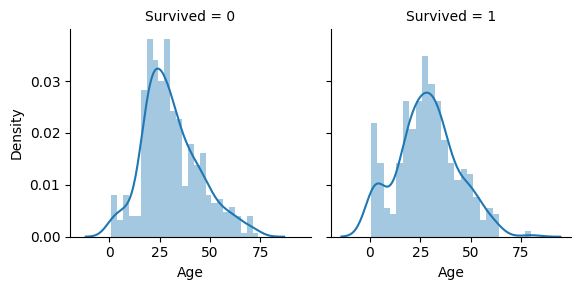

In [30]:
#Age--Survived
g=sbn.FacetGrid(train_df,col="Survived")
g.map(sbn.distplot,"Age",bins=25)
plt.show()

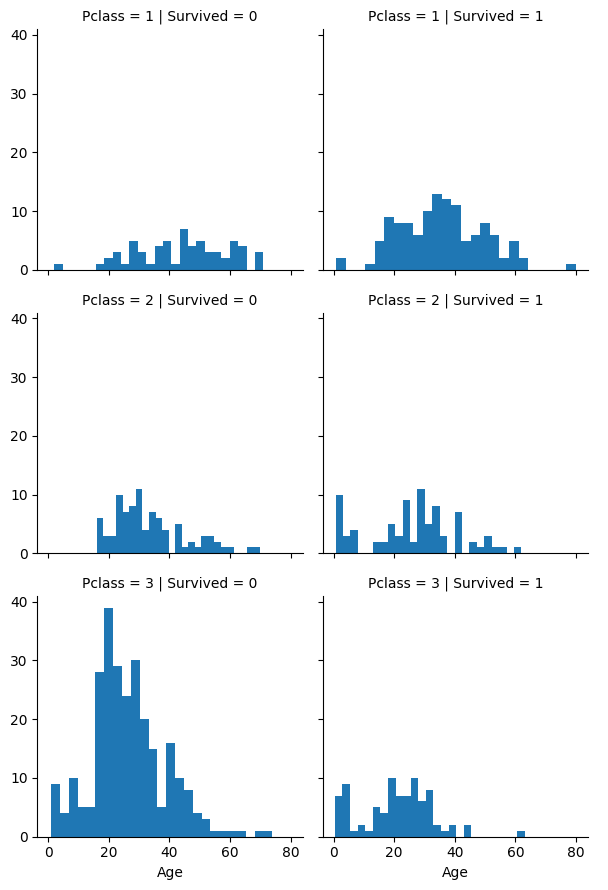

In [31]:
#Pclass--Survived--Age
g=sbn.FacetGrid(train_df,col="Survived",row="Pclass")
g.map(plt.hist,"Age",bins=25)
g.add_legend()
plt.show()

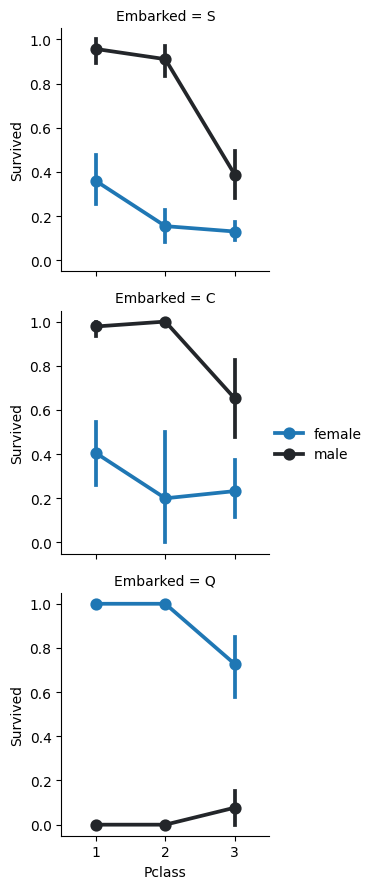

In [32]:
#Embarked--Sex--Pclass--Survived
g=sbn.FacetGrid(train_df,row="Embarked")
g.map(sbn.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

In [33]:
#Fill missing :Age feature
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


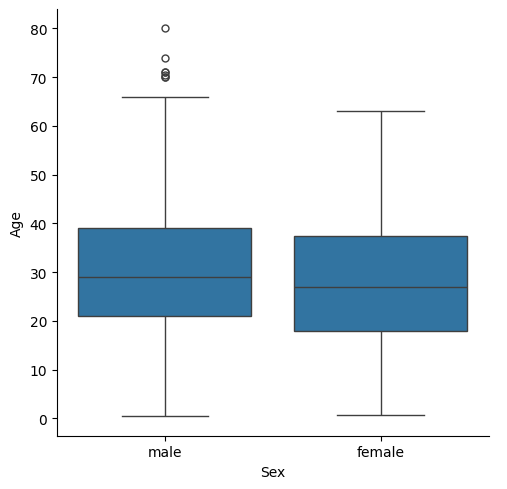

In [34]:
sbn.catplot(x="Sex",y="Age",data=train_df,kind="box")
plt.show()

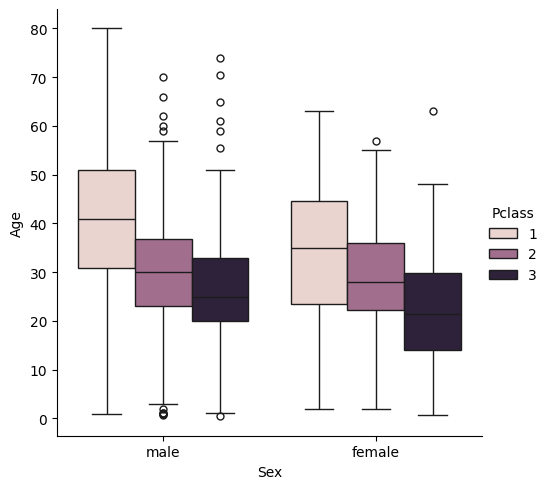

In [35]:
sbn.catplot(x="Sex",y="Age",hue="Pclass",data=train_df,kind="box")
plt.show()

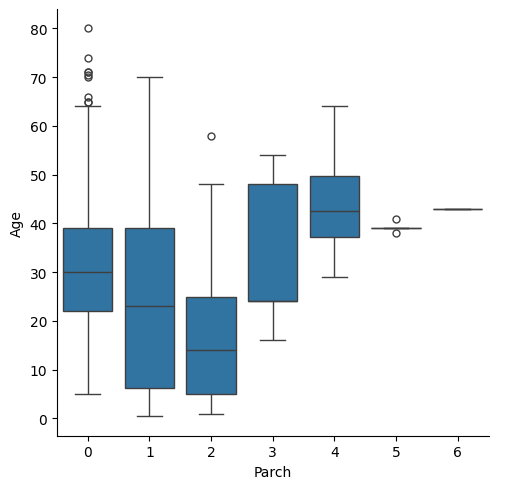

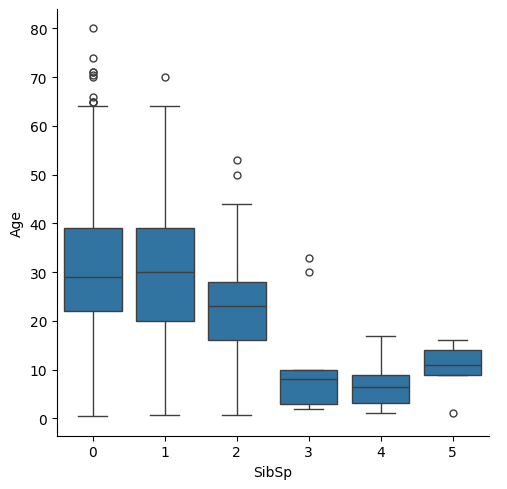

In [36]:
sbn.catplot(x="Parch",y="Age",data=train_df,kind="box")
sbn.catplot(x="SibSp",y="Age",data=train_df,kind="box")
plt.show()

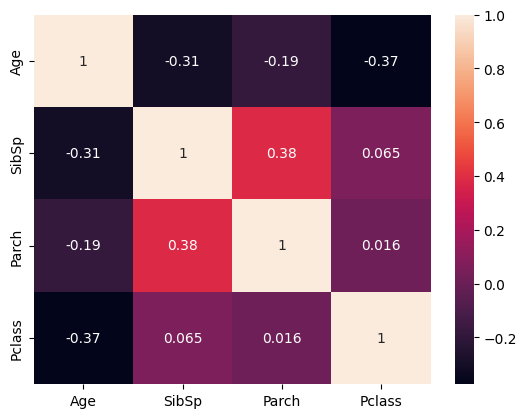

In [37]:
sbn.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].select_dtypes(include='number').corr(),annot=True)
plt.show()

In [38]:
index_nan_age=list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred=train_df["Age"][((train_df["SibSp"]==train_df.iloc[i]["SibSp"])&(train_df["Parch"]==train_df.iloc[i]["Parch"])&(train_df["Pclass"]==train_df.iloc[i]["Pclass"]))].median()
    age_med=train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i]=age_pred
    else:
        train_df["Age"].iloc[i]=age_med

In [39]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<h>Feature Engineering</h>

In [40]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [41]:
name=train_df["Name"]
train_df["Title"]=[i.split(".")[0].split(",")[-1].strip() for i in name]

In [42]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

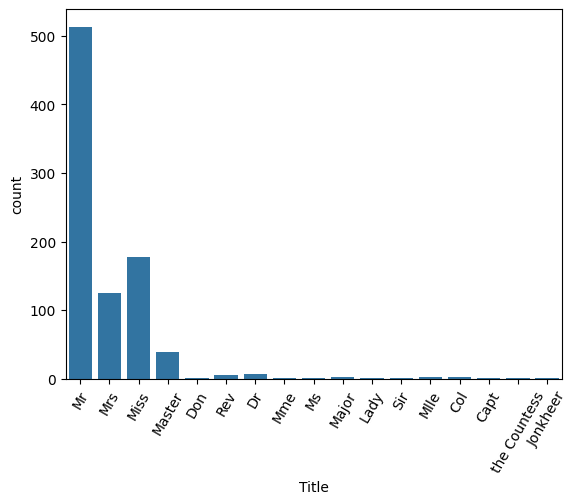

In [43]:
sbn.countplot(x="Title",data=train_df)
plt.xticks(rotation=60)#xlabeldaki isimlerin eğimini ayarlıyoruz
plt.show()

In [44]:
#convert to categorical
train_df["Title"]=train_df["Title"].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major','Rev','Sir','the Countess'],"other")
train_df["Title"]=[0 if i=="Master" else 1 if i=="Miss" or i=="Ms" or i=="Mlle" or i=="Mrs" else  2 if i=="Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(10)

0    2
1    1
2    1
3    1
4    2
5    2
6    2
7    0
8    1
9    1
Name: Title, dtype: int64

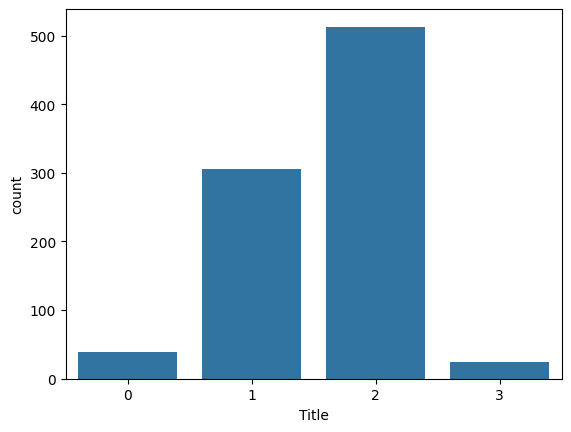

In [45]:
sbn.countplot(x="Title",data=train_df)
plt.show()

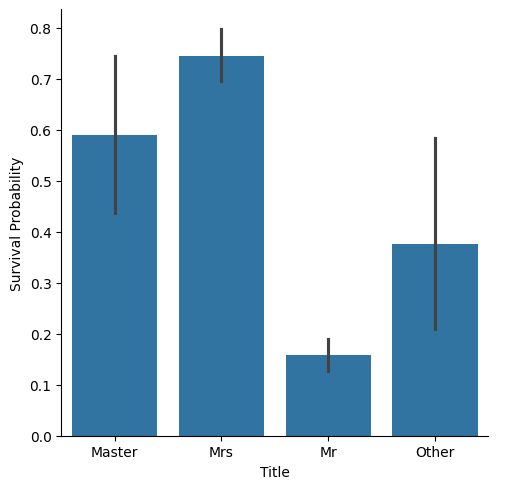

In [46]:
g=sbn.catplot(x="Title",y="Survived",data=train_df,kind="bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [47]:
train_df.drop(labels=["Name"],axis=1,inplace=True)

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [49]:
train_df=pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [50]:
#family size
train_df["Fsize"]=train_df["SibSp"]+train_df["Parch"]+1 #anne baba kardeş çocuk sayıları ve kendisini toplayıp toplam aile üyesini buluyoruz

In [51]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


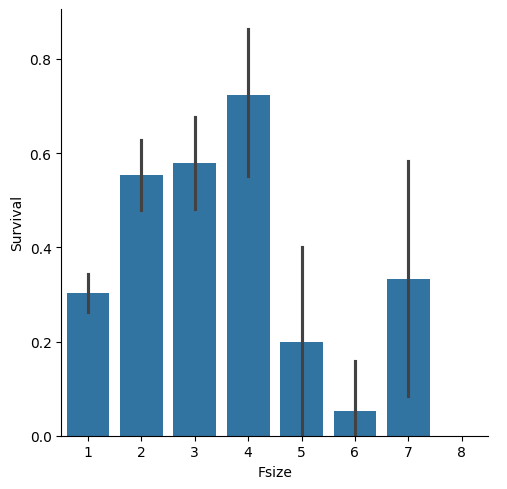

In [52]:
g=sbn.catplot(x="Fsize",y="Survived",data=train_df,kind="bar")
g.set_ylabels("Survival")
plt.show()

In [53]:
train_df["family_size"]=[1 if i<5 else 0 for i in train_df["Fsize"]] 

In [54]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1


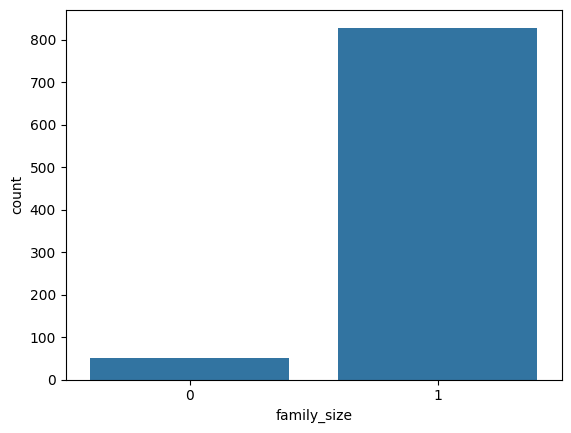

In [55]:
sbn.countplot(x="family_size",data=train_df)
plt.show()

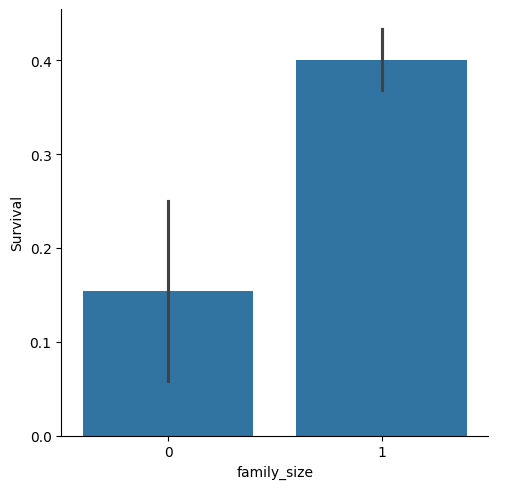

In [56]:
g=sbn.catplot(x="family_size",y="Survived",data=train_df,kind="bar")
g.set_ylabels("Survival")
plt.show()

In [57]:
train_df=pd.get_dummies(train_df,columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


In [58]:
#Embarked
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

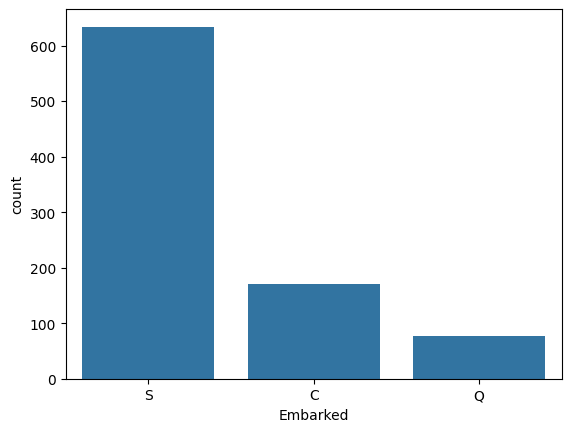

In [59]:
sbn.countplot(x="Embarked",data=train_df)
plt.show()

In [60]:
train_df=pd.get_dummies(train_df,columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


In [61]:
#ticket
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [62]:
tickets=[]
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"]=tickets

In [63]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [64]:
train_df=pd.get_dummies(train_df,columns=["Ticket"],prefix="T")
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,False,True,False,False,False,False
3,4,1,1,female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True
5,6,0,3,male,26.0,0,0,8.4583,NaN,False,...,False,False,False,False,False,False,False,False,False,True
6,7,0,1,male,54.0,0,0,51.8625,E46,False,...,False,False,False,False,False,False,False,False,False,True
7,8,0,3,male,2.0,3,1,21.0750,NaN,True,...,False,False,False,False,False,False,False,False,False,True
8,9,1,3,female,27.0,0,2,11.1333,NaN,False,...,False,False,False,False,False,False,False,False,False,True
9,10,1,2,female,14.0,1,0,30.0708,NaN,False,...,False,False,False,False,False,False,False,False,False,True


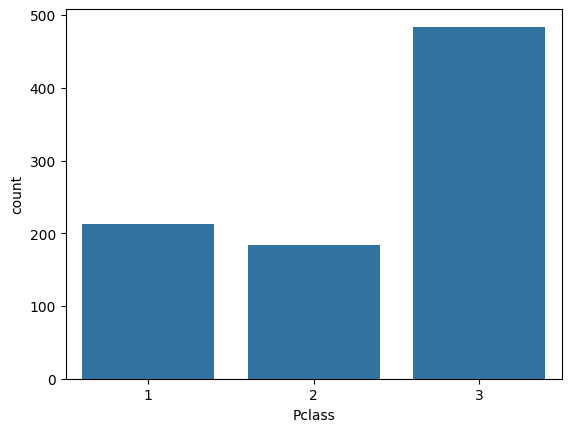

In [65]:
#Pclass
sbn.countplot(x="Pclass",data=train_df)
plt.show()

In [66]:
train_df["Pclass"]=train_df["Pclass"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,female,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1,female,26.0,0,0,7.9250,NaN,False,True,...,False,False,True,False,False,False,False,False,False,True
3,4,1,female,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0,male,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


In [67]:
#Sex
train_df["Sex"]=train_df["Sex"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1,26.0,0,0,7.9250,NaN,False,True,False,...,True,False,False,False,False,False,False,True,True,False
3,4,1,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


In [68]:
#drop passenger id and cabin
train_df.drop(labels=["PassengerId","Cabin"],axis=1,inplace=True)

In [69]:
train_df.drop(labels=["Fsize"],axis=1,inplace=True)

In [70]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'family_size_0', 'family_size_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA',
       'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP', 'T_PPP',
       'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

<h>MODELLİNG</h>

In [71]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [72]:
#train-test split
train=train_df[:train_df_len]
X=train.drop(labels=["Survived"],axis=1)
y=train["Survived"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)


In [73]:
print("X_train.:",len(X_train))
print("X_test.:",len(X_test))
print("y_train.:",len(y_train))
print("y_test.:",len(y_test))

X_train.: 590
X_test.: 291
y_train.: 590
y_test.: 291


In [74]:
#Logistic Regression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
acc_log_train=round(log_reg.score(X_train,y_train)*100,2)
acc_log_test=round(log_reg.score(X_test,y_test)*100,2)
print(f"Training Accuracy..: % {acc_log_train}")
print(f"Testing Accuracy..: % {acc_log_test}")

Training Accuracy..: % 82.71
Testing Accuracy..: % 82.13


In [75]:
random_state=42
classifier=[DecisionTreeClassifier(random_state=random_state),
            SVC(random_state=random_state),
            RandomForestClassifier(random_state=random_state),
            LogisticRegression(random_state=random_state),
            KNeighborsClassifier()]

dt_param_grid={"min_samples_split":range(10,500,20),
               "max_depth":range(1,20,2)}

svc_param_grid={"kernel":["rbf"],
                "gamma":[0.001,0.01,0.1,1],
                "C":[1,10,50,100,200,300,1000]}

rf_param_grid={"max_features":[1,3,10],
               "min_samples_split":[2,3,10],
               "min_samples_leaf":[1,3,10],
               "bootstrap":[False],
               "n_estimators":[100,300],
               "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                   "penalty":["l1","l2"]}

knn_param_grid={"n_neighbors":np.linspace(1,19,10,dtype=int).tolist(),
                "weights":["uniform","distance"],
                "metric":["euclidian","manhattan"]}

classifier_param=[dt_param_grid,
                  svc_param_grid,
                  rf_param_grid,
                  logreg_param_grid,
                  knn_param_grid]

In [76]:
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7966101694915253
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8440677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8169491525423729
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.771186440677966


In [77]:
cv_result=pd.DataFrame({"Cross Validation Accuracy Means":cv_result, "ML Models":["DecisionTreeClassifier","SVM","RandomForestClassifier","LogisticRegression","KNeighborsClassifier"]})
cv_result

,Cross Validation Accuracy Means,ML Models
0,0.835593,DecisionTreeClassifier
1,0.796610,SVM
2,0.844068,RandomForestClassifier
3,0.816949,LogisticRegression
4,0.771186,KNeighborsClassifier


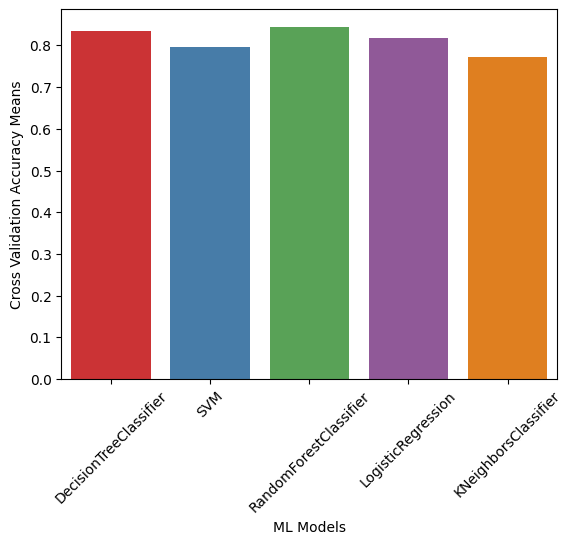

In [95]:
sbn.barplot(cv_result,x="ML Models",y="Cross Validation Accuracy Means",palette="Set1")
_=plt.xticks(rotation=45)

In [96]:
#Ensemble Modeling
votinC=VotingClassifier(estimators=[("dt",best_estimators[0]),
                                    ("rfc",best_estimators[2]),
                                    ("lr",best_estimators[3])],
                                    voting="soft",n_jobs=-1)
votinC=votinC.fit(X_train,y_train)
print(accuracy_score(votinC.predict(X_test),y_test))

0.8247422680412371
